In [51]:
import pandas as pd
import numpy as np
import math
from scipy.stats import jarque_bera,norm
from datetime import datetime
from datetime import timedelta
import risk_kit_Daxal as rd

import yfinance as yf
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
### importing stocks returns data from function rd.get_returns() ###
l = ['TATAMOTORS','ADANIENT','RS','HINDUNILVR','TECHM','ASIANPAINT', 'SUNPHARMA', 'ICICIBANK','TATASTEEL','INFY']
df = rd.get_returns(l)
df

,TATAMOTORS,ADANIENT,RS,HINDUNILVR,TECHM,ASIANPAINT,SUNPHARMA,ICICIBANK,TATASTEEL,INFY
Date,,,,,,,,,,
2008-07-01,-4.834907,4.467209,-17.329845,15.466148,5.402781,4.543877,0.074479,1.158728,-9.328719,-9.205851
2008-08-01,9.552235,-7.052044,-8.461787,3.109241,-0.193593,2.437503,3.697704,9.252029,-7.917533,12.121793
2008-09-01,-18.365329,-19.388990,-32.062978,2.791364,-17.549932,-1.969448,1.180049,-18.485540,-28.570238,-20.111426
2008-10-01,-50.855075,-20.523505,-34.191848,-13.039216,-47.200000,-19.080508,-24.468089,-24.206427,-51.220931,-2.529828
2008-11-01,-25.516870,-20.828949,-17.288404,4.880213,-36.307171,-9.229590,-3.723315,-15.265059,-32.107627,-11.223325
...,...,...,...,...,...,...,...,...,...,...
2023-02-01,-7.902797,-54.462438,9.678274,-5.366897,8.074261,2.872936,-7.704180,1.351587,-13.447128,-3.543633
2023-03-01,-0.166076,22.924856,2.556521,4.163958,0.145419,-2.346185,3.375392,1.533565,-0.191019,-4.318552
2023-04-01,14.645393,9.968865,-3.305103,-4.385212,-7.323915,5.657189,0.677882,4.254716,2.711702,-12.700348


In [62]:
### initilizing 'cov' variable and storing covarience matrix in it ###
cov = rd.cov(df)
### initilizing 'ar' as annualized returns of every stock ###
ar = rd.annualized_returns(df)
print(ar)
cov

Stocks
ADANIENT      1.982842
ASIANPAINT    1.661893
HINDUNILVR    1.343028
ICICIBANK     0.987061
INFY          0.864327
RS            0.411821
SUNPHARMA     0.954542
TATAMOTORS    0.688910
TATASTEEL     0.021425
TECHM         0.824804
Name: Annualized Returns, dtype: float64


,TATAMOTORS,ADANIENT,RS,HINDUNILVR,TECHM,ASIANPAINT,SUNPHARMA,ICICIBANK,TATASTEEL,INFY
TATAMOTORS,0.022862,0.010771,0.005341,0.000398,0.006153,0.002959,0.004235,0.009927,0.012500,0.002787
ADANIENT,0.010771,0.033511,0.002995,0.001312,0.006612,0.004652,0.001257,0.011622,0.012221,0.001922
RS,0.005341,0.002995,0.008514,-0.000614,0.003337,0.000623,0.002258,0.003226,0.005848,0.001849
HINDUNILVR,0.000398,0.001312,-0.000614,0.004255,0.001476,0.001545,0.000648,0.000886,0.000740,0.000171
TECHM,0.006153,0.006612,0.003337,0.001476,0.012231,0.002937,0.001851,0.005100,0.007122,0.004331
ASIANPAINT,0.002959,0.004652,0.000623,0.001545,0.002937,0.005881,0.001221,0.003458,0.003076,0.001294
SUNPHARMA,0.004235,0.001257,0.002258,0.000648,0.001851,0.001221,0.006515,0.002152,0.003126,0.001727
ICICIBANK,0.009927,0.011622,0.003226,0.000886,0.005100,0.003458,0.002152,0.011391,0.010643,0.001706
TATASTEEL,0.012500,0.012221,0.005848,0.000740,0.007122,0.003076,0.003126,0.010643,0.019781,0.002197
INFY,0.002787,0.001922,0.001849,0.000171,0.004331,0.001294,0.001727,0.001706,0.002197,0.006355


In [74]:
### WRITING RD.MSR CODE HERE BECAUSE ITS TOO HARD TO FIND IT IN RISK KIT :) ###


# in this code of finding optimal weights by minimizing the negative of sharpe ratio #
# in the equation of sharpe ration we dont use the "risk free rate of return" as its const. and during minimizing the (-sharpe ratio) it will not create any significance impact #


"""
def msr( er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe(weights ,er, cov):
        r = port_ret(weights, er)
        vol = port_vol(weights, cov)
        return -(r)/vol
    
    weights = minimize(neg_sharpe, init_guess,
                       args=(er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x
"""

opt_wt = rd.msr(0.03, ar, cov) # In this portfolio we are having Risk free return as "0.03" #
opt_wt #optimal weights

array([0.06611958, 0.02817236, 0.25219824, 0.46442171, 0.        ,
       0.        , 0.07844656, 0.        , 0.        , 0.11064155])

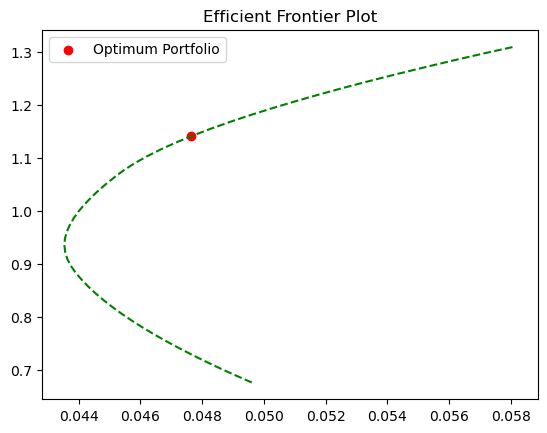

In [70]:
# CODE FOR RD.PORTFOLIO_PLOT() :- #
"""
def portfolio_plot(n_port, er, cov):
    expected_returns = np.zeros(n_port)
    expected_vol = np.zeros(n_port)
    n = er.shape[0]
    weights = np.zeros((n_port,n))
    for k in range(n_port):
        w = np.array(np.random.random(n))
        w =w /np.sum(w)
        weights[k,:] = w
    
        expected_returns[k]= port_ret(w,er)
        expected_vol[k] = port_vol(w, cov)

    opt_wt = msr(0.03, er, cov)
    x = port_vol(opt_wt, cov)
    y = port_ret(opt_wt, er) 
    plt.title("Efficient Frontier Plot")
#     plt.figure(figsize=(8,8))
#     plt.scatter(expected_vol,expected_returns)
    plt.scatter(x, y, color='red', marker='o', label='Point')
    plt.legend(['Optimal Portfolio'])
    
    max_ret = expected_returns.max()
    min_ret = expected_returns.min()
    Rets = np.linspace(min_ret,max_ret,50)
    opt_vol = []
    init_guess = np.repeat((1/n), n)
    bounds = ((0.,1.),)*n
    for a in Rets:
        constraints = ({'type': 'eq', 'fun': lambda w: 1-np.sum(w)},
                       {'type': 'eq', 'args':(er,), 'fun': lambda w,er: port_ret(w,er)-a})
        min_vol = minimize(port_vol, init_guess, args=(cov,), method='SLSQP', bounds=bounds, constraints = constraints)
        opt_vol.append(min_vol['fun'])
        
    plt.plot(opt_vol, Rets,'--', color= 'Green')
"""

rd.portfolio_plot(1000, ar,cov)

In [68]:
portfolio_returns = rd.port_ret(opt_wt, ar)
portfolio_volatility = rd.port_vol(opt_wt, cov)
portfolio_sharpe = rd.port_sr(opt_wt, ar, cov, 0.03)